In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import glob

In [2]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# def rebin(hx,h, bin=1):
#     h_rebin = []
#     for i,x in enumerate(h[:int(len(h)/bin)]):
#         num = i*bin
#         h_rebin.append(h[num]+h[num+1])
#     hx_rebin = [x for x in range(int(len(hx)/bin))]
#     return np.array(hx_rebin), np.array(h_rebin)

In [4]:
def rebin(hx,h,bins):
    h_rebin=[]
    for i in range(int(len(h)/bins)):
        start_idx=i*bins
        end_idx=(i+1)*bins
        h_rebin.append(np.sum(h[start_idx:end_idx]))
    hx_rebin=range(len(h_rebin))
    return np.array(hx_rebin), np.array(h_rebin)

In [5]:
def gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

def line(x,a,b):
    return a*(x-b)

Number of files: 60


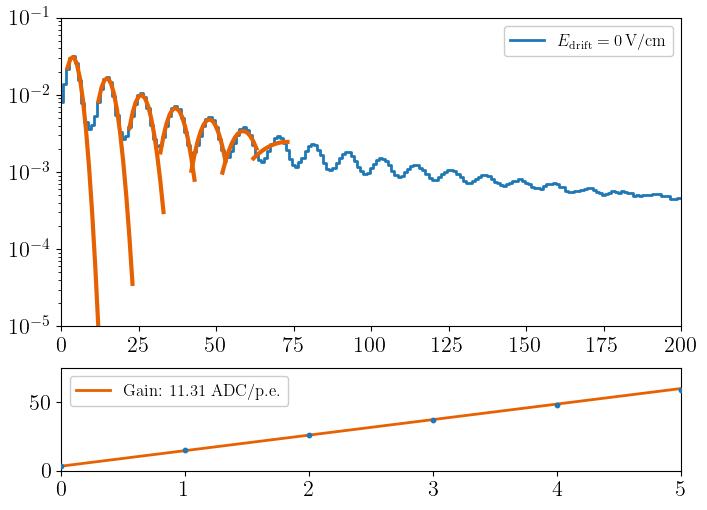

In [12]:
f, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
ax[0].set_xlim(0,16384)
ax[0].set_xlim(0,1638)
ax[0].set_xlim(0,200)
ax[0].set_yscale('log')

sumdata = 0
Path = "C:\\Users\\nEXO\\Downloads\\SiPM_response_LXe_0V\\"

Files = glob.glob(Path+"*.csv")
print('Number of files: {}'.format(len(Files)))

for j,f in enumerate(Files): 
    data = pd.read_csv(f, delimiter=',', skiprows=1)
    if j==0:
        sumdata = data['Counts']
    else:
        sumdata += data['Counts']
hx,h = rebin(np.array(data['Channel']), np.array(sumdata), 10)
h = h/np.sum(h)
ax[0].step(hx,h, label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(0), where='mid')

p0 = hx[np.where(h == np.max(h))][0]
params = []
for i in range(7):

    # set gain and first peak position estimate manually
    if(i>0): p0 = p0 + 10

    # select events around that peak
    cut = np.where((hx>p0-3) & (hx<p0+3))

    #find position of max in the selected region
    p0_max = hx[np.where(h == np.max(h[cut]))][0]

    # redefine selection cut based on true peak position
    cut = np.where((hx>p0-3) & (hx<p0+10))

    # run and plot fit
    popt,pcov = curve_fit(gauss, hx[cut], h[cut], p0=[np.max(h[cut]),p0,1],maxfev=10000)
    ax[0].plot(hx[cut], gauss(hx[cut], *popt), color=colors[1],lw=3)
    ax[0].set_ylim(1E-5,1E-1)
    # append best fit parameters
    params.append(popt)

ax[0].legend(loc='upper right')
ax[1].set_xlim(0,5)
xdata = [i for i,x in enumerate(params)]
ax[1].scatter(xdata, np.array(params)[:,1], s=10, zorder=10)
popt_nof,pcov = curve_fit(line, xdata, np.array(params)[:,1], p0=[10,0] )
ax[1].plot(xdata, line(xdata, *popt_nof), color=colors[1], label='Gain: {:.2f} ADC/p.e.'.format(popt_nof[0]))
ax[1].legend(loc='upper left')

Number of files: 161


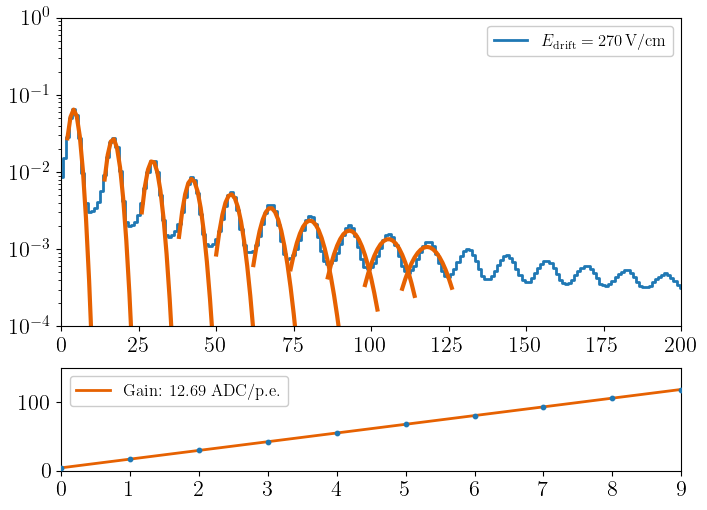

In [10]:
f, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
ax[0].set_xlim(0,16384)
ax[0].set_xlim(0,1638)
ax[0].set_xlim(0,200)
ax[0].set_yscale('log')

sumdata = 0
Path = "C:\\Users\\nEXO\\Downloads\\SiPM_response_LXe_273V\\"

Files = glob.glob(Path+"*.csv")
print('Number of files: {}'.format(len(Files)))

for j,f in enumerate(Files): 
    data = pd.read_csv(f, delimiter=',', skiprows=1)
    if j==0:
        sumdata = data['Counts']
    else:
        sumdata += data['Counts']
hx,h = rebin(np.array(data['Channel']), np.array(sumdata), 10)
h = h/np.sum(h)
ax[0].step(hx,h, label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(270), where='mid')

p0 = hx[np.where(h == np.max(h))][0]
params = []
for i in range(10):

    # set gain and first peak position estimate manually
    if(i>0): p0 = p0 + 12

    # select events around that peak
    cut = np.where((hx>p0-3) & (hx<p0+3))

    #find position of max in the selected region
    p0_max = hx[np.where(h == np.max(h[cut]))][0]

    # redefine selection cut based on true peak position
    cut = np.where((hx>p0-3) & (hx<p0+15))

    # run and plot fit
    popt,pcov = curve_fit(gauss, hx[cut], h[cut], p0=[np.max(h[cut]),p0,1] )
    ax[0].plot(hx[cut], gauss(hx[cut], *popt), color=colors[1],lw=3)
    ax[0].set_ylim(1E-4,1E0)

    # append best fit parameters
    params.append(popt)

ax[0].legend(loc='upper right')
ax[1].set_xlim(0,9)
xdata = [i for i,x in enumerate(params)]
ax[1].scatter(xdata, np.array(params)[:,1], s=10, zorder=10)
popt_wf,pcov = curve_fit(line, xdata, np.array(params)[:,1], p0=[10,0] )
ax[1].plot(xdata, line(xdata, *popt_wf), color=colors[1], label='Gain: {:.2f} ADC/p.e.'.format(popt_wf[0]))
ax[1].legend(loc='upper left')

In [8]:
Path = "C:\\Users\\nEXO\\Downloads\\"
Files = glob.glob(Path+"SiPM_response_0V\*.csv")
print('Number of files: {}'.format(len(Files)))

for j,f in enumerate(Files): 
    data = pd.read_csv(f, delimiter=',', skiprows=1)
    if j==0:
        sumdata = data['Counts']
    else:
        sumdata += data['Counts']
hx_nof,h_nof = rebin(np.array(data['Channel']), np.array(sumdata), 10)
print(np.sum(sumdata))

Files2 = glob.glob(Path+"SiPM_response_273V/*.csv")
print('Number of files: {}'.format(len(Files2)))

for j,f in enumerate(Files2): 
    data = pd.read_csv(f, delimiter=',', skiprows=1)
    if j==0:
        sumdata = data['Counts']
    else:
        sumdata += data['Counts']
hx_wf,h_wf = rebin(np.array(data['Channel']), np.array(sumdata), 10)
print(np.sum(sumdata))

Number of files: 0
13738585
Number of files: 0
13738585


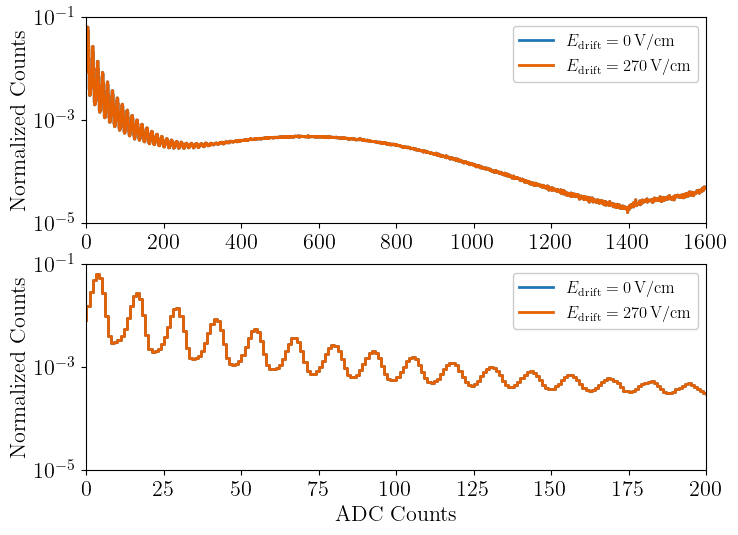

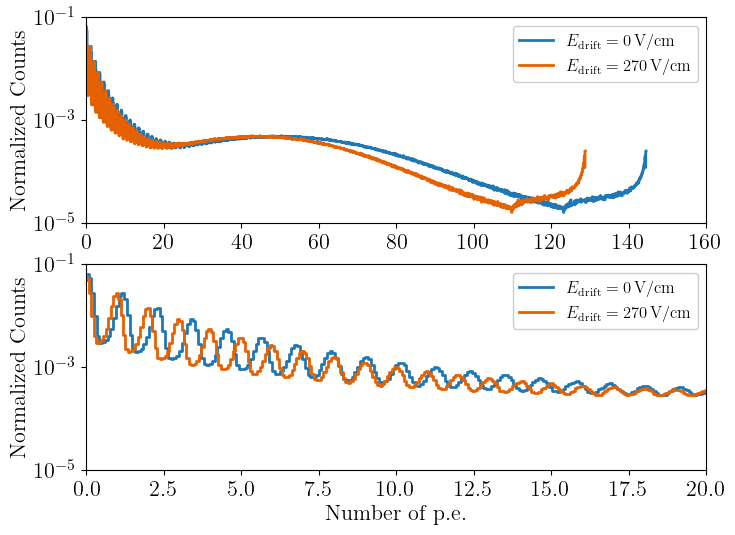

In [9]:
f, ax = plt.subplots(2,1)

ax[0].set_xlim(0,1600)
ax[0].set_yscale('log')
ax[0].set_ylabel('Normalized Counts')
ax[0].step(hx_nof, h_nof/np.sum(h_nof), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(0))
ax[0].step(hx_wf, h_wf/np.sum(h_wf), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(270))
ax[0].legend(loc='upper right')

ax[1].set_xlim(0,200)
ax[1].set_yscale('log')
ax[1].set_ylabel('Normalized Counts')
ax[1].step(hx_nof, h_nof/np.sum(h_nof), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(0))
ax[1].step(hx_wf, h_wf/np.sum(h_wf), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(270))
ax[1].legend(loc='upper right')

plt.xlabel('ADC Counts')
plt.savefig('source_data_field_comparison_uncalibrated.pdf')
plt.show()

f, ax = plt.subplots(2,1)

ax[0].set_xlim(0,160)
ax[0].set_yscale('log')
ax[0].set_ylabel('Normalized Counts')
ax[0].step(hx_nof/popt_nof[0]+popt_nof[1],h_nof/np.sum(h_nof), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(0))
ax[0].step(hx_wf/popt_wf[0]+popt_wf[1],h_wf/np.sum(h_wf), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(270))
ax[0].legend(loc='upper right')

ax[1].set_xlim(0,20)
ax[1].set_yscale('log')
ax[1].set_ylabel('Normalized Counts')
ax[1].step(hx_nof/popt_nof[0]+popt_nof[1],h_nof/np.sum(h_nof), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(0))
ax[1].step(hx_wf/popt_wf[0]+popt_wf[1],h_wf/np.sum(h_wf), label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(270))
ax[1].legend(loc='upper right')

plt.xlabel('Number of p.e.')
plt.savefig('source_data_field_comparison_calibrated.pdf')
plt.show()